In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from importlib import import_module
import json
# from brokenaxes import brokenaxes
import numpy as np
import utils
import losses
from PIL import Image
from sklearn.manifold import TSNE
import models
import sklearn
from collections import Counter
from sklearn.linear_model import LinearRegression
import itertools
from sklearn.metrics import accuracy_score, recall_score
from sklearn.cluster import *
from sklearn.mixture import *
from hdbscan import HDBSCAN
from matplotlib.ticker import FormatStrFormatter

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import tensorflow as tf
%matplotlib inline
plt.rcParams.update({'font.size': 18})

In [3]:
MODEL = 'B2_0621_1427_1709103_lj_samples_N15_L8'
with open(f'model/{MODEL}/report.txt') as f:
    accuracy = float(next(f))
    confusion = np.loadtxt(f)

recall = confusion / np.sum(confusion, axis=-1, keepdims=True)

/home/kiwi/anaconda3/envs/opsi/lib/python3.8/site-packages/brokenaxes.py:122: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/home/kiwi/anaconda3/envs/opsi/lib/python3.8/site-packages/brokenaxes.py:124: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kiwi/anaconda3/envs/opsi/lib/python3.8/site-packages/brokenaxes.py:252: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  for ax in self.axs if ax.is_last_row())
/home/kiwi/anaconda3/envs/opsi/lib/python3.8/site-packages/brokenaxes.py:261: MatplotlibDeprecationWarning: 
The is_first_col 

Text(0, 0.5, 'Predicted percentage')

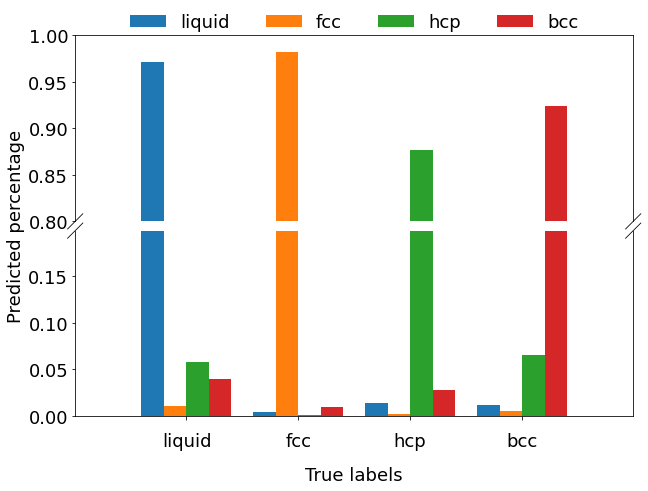

In [4]:
labels = ['liquid', 'fcc', 'hcp', 'bcc']
x = np.arange(len(labels))
width = 0.2
plt.figure(figsize=(10,7))
bax = brokenaxes(xlims=((-0.99, 3.99),), ylims=((0, .199), (.8, 1)), hspace=.05, despine=False)
for i in range(4):
    bax.bar(x + width*(i-1.5), recall[i], width=width, label=labels[i], tick_label=labels)
    plt.text(0.2*(i+1), -0.08, s=labels[i], ha='center')
# bax.bar(x + width*(-1.5), recall[0], width=width, label=labels[0], tick_label=labels)
# bax.bar(x + width*(-0.5), recall[1], width=width, label=labels[1], tick_label=labels)
# bax.bar(x + width*( 0.5), recall[2], width=width, label=labels[2], tick_label=labels)
# bax.bar(x + width*( 1.5), recall[3], width=width, label=labels[3], tick_label=labels)
# plt.text(0.2, -0.08, s=labels[0], ha='center')
# plt.text(0.4, -0.08, s=labels[1], ha='center')
# plt.text(0.6, -0.08, s=labels[2], ha='center')
# plt.text(0.8, -0.08, s=labels[3], ha='center')
bax.legend(loc='upper center', bbox_to_anchor=(0.5,1.1), ncol=4, framealpha=0)
bax.set_xlabel('True labels')
bax.set_ylabel('Predicted percentage', labelpad=50)

In [2]:
def comparison_CNA_PTM(MODEL):
    df = pd.read_csv('model/' + MODEL + '/report.csv', index_col=0)
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10), sharex=True)
    # Main
    ax1.plot(df.index, df['density'])
    ax1.set_ylabel('Packing density')
    
    
    fig.subplots_adjust(hspace=0.1) 
    
    ax2.scatter(df.index, df['CNA'], marker='o')
    ax2.scatter(df.index, df['PTM'], marker='v')
    mean_CNA = np.mean(df['CNA'])
    mean_PTM = np.mean(df['PTM'])
    print(mean_CNA, mean_PTM)
    ax2.legend(['CNA', 'PTM'])
    ax2.set_ylabel('Rand Index')
    plt.xlabel('Packing Number')
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.3f'))
    
    plt.savefig('model/' + MODEL + '/comparison.png', bbox_inches='tight')
    plt.show()

In [55]:
def comparison_CNA_PTM(MODEL):
    df = pd.read_csv('model/' + MODEL + '/report.csv', index_col=0)
    plt.figure(figsize=(10,10))
    
    plt.scatter(df['density'], df['CNA'], marker='o')
    plt.scatter(df['density'], df['PTM'], marker='v')
    mean_CNA = np.mean(df['CNA'])
    mean_PTM = np.mean(df['PTM'])
    print(mean_CNA, mean_PTM)
    plt.legend(['CNA', 'PTM'])
    plt.ylabel('Rand Index')
    plt.xlabel('Packing Density')
    # plt.set_major_formatter(FormatStrFormatter('%0.3f'))
    # plt.ylim([0.6,1])
    
    plt.savefig('image/comparison.png', bbox_inches='tight')
    plt.show()

0.879038218218218 0.9064968168168167


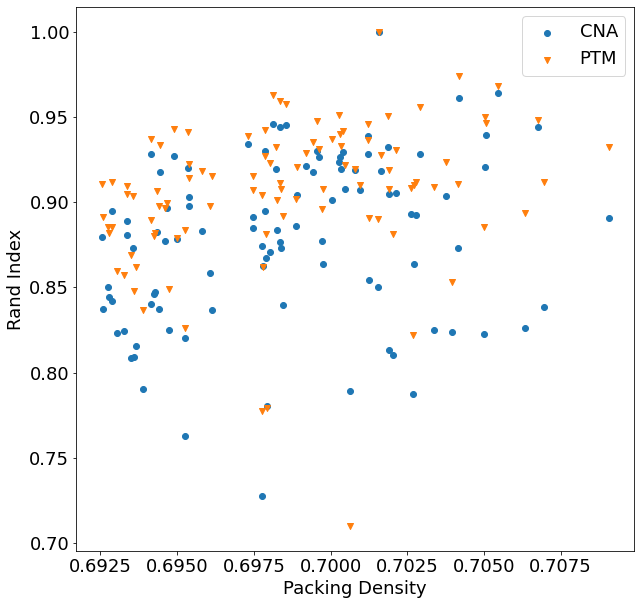

In [56]:
comparison_CNA_PTM('B2_0715_2124_1071408_SP100_70_N12_L4')

In [5]:
def comparison_HEX(MODEL):
    df = pd.read_csv(f'model/{MODEL}/report.csv', index_col=0)
    # plt.figure(figsize=(10,10))
    # Main
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10), sharex=True)
    
    # plt.legend(['PTM', 'CNA'])
    # plt.axhline(y=mean_PTM, color='g')
    # plt.text(100, mean_PTM-0.01, f'PTM mean: {mean_PTM:.4f}', ha='right',color='g', weight='bold')
    
    
    # plt.title('Comparison with PTM')
    # Insect

    ax1.plot(df.index, df['density'])
    fig.subplots_adjust(hspace=0.1) 
    ax1.set_ylabel('Packing density')
    
    ax2.scatter(df.index, df['Hex.99'])
    ax2.set_ylabel('Rand Index')
    ax2.set_xlabel('Packing Number')
    mean_HEX = np.mean(df['Hex.99'])
    print(mean_HEX)

    plt.savefig(f'model/{MODEL}/comparison.png', bbox_inches='tight')
    plt.show()

In [57]:
def comparison_HEX(MODEL):
    df = pd.read_csv(f'model/{MODEL}/report.csv', index_col=0)
    plt.figure(figsize=(10,10))
    
    plt.scatter(df['density'], df['Hex.99'])
    plt.ylabel('Rand Index')
    plt.xlabel('Packing Density')

    plt.savefig(f'image/QuasicrystalDiskComparison.png', bbox_inches='tight')
    plt.show()

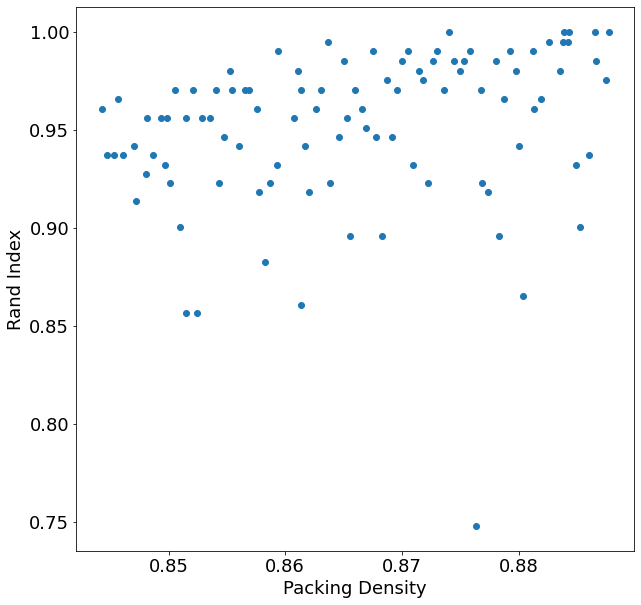

In [58]:
comparison_HEX('B2_0716_2148_324969_CP100_N6_L2')

In [9]:
def plot_motif_rate(MODEL):
    pds = []
    rates = []
    for root, dirs, files in os.walk(f'model/{MODEL}/packing'):
        for name in files:
            if name[-3:] == 'xyz' and name[-8:-4] != 'true':
                pds.append(float(name[:-4].split('_')[2]))

                df = pd.read_csv(os.path.join(root, name), skiprows=2, header=None, sep=' ')
                rates.append(df[2].sum() / 150)

    plt.figure(figsize=(10,10))
    
    plt.scatter(pds, rates)
    plt.xlabel('Packing Density')
    plt.ylabel('Motif Ratio')

    plt.savefig(f'image/DisorderedDiskRatio.png', bbox_inches='tight')
    plt.show()

In [12]:
MODEL = 'B2_0619_1508_1575751_lj_samples_N19_L8'

In [34]:
network = import_module(f'model.{MODEL}.training.network')

args_dict = json.load(open(f'model/{MODEL}/training/arguments.json'))
MODEL_NAME = args_dict['model_name']
DATASET = args_dict['dataset']

REPEAT_SIZE = args_dict['repeat_size']
BATCH_SIZE = args_dict['batch_size']
CLOUD_SIZE = args_dict['cloud_size']
DIMEN_SIZE = args_dict['dimen_size']
LATENT_DIM = args_dict['latent_dim']

EPOCHS = args_dict['epochs']
LEARNING_RATE = args_dict['learning_rate']

L2_WEIGHT = args_dict['l2_weight']
CLOSS_WEIGHT = args_dict['closs_weight']
OLOSS_WEIGHT = args_dict['oloss_weight']
RLOSS_WEIGHT = args_dict['rloss_weight']
WLOSS_WEIGHT = args_dict['wloss_weight']

RADIUS = args_dict['radius']

# Read data
pointcloud_dataset = utils.PointCloudDataset(f'data/{DATASET}', CLOUD_SIZE)
dataset = pointcloud_dataset.make_dataset(10000)
DATASET_SIZE, CLOUD_SIZE, DIMEN_SIZE = dataset.shape

print(f'[*] Read {DATASET_SIZE} samples with batch size {BATCH_SIZE}.')

# Load model
model = network.PointNetAutoEncoder(REPEAT_SIZE, BATCH_SIZE, CLOUD_SIZE, DIMEN_SIZE, LATENT_DIM, L2_WEIGHT, CLOSS_WEIGHT, OLOSS_WEIGHT, RADIUS)
model.compile(loss=losses.CombinedReconstructionLoss(2*RADIUS, RLOSS_WEIGHT, WLOSS_WEIGHT))

# Best checkpoint
ckpts, ckpt_epochs, ckpt_losses = [], [],[]
for root, dirs, files in os.walk(f'model/{MODEL}/training/checkpoint'):
    for name in files:
        prefix, ext = os.path.splitext(name)
        if ext == '.index':
            ckpts.append(os.path.join(root, prefix))
            ckpt_epoch, ckpt_loss = prefix[8:].split('-')
            ckpt_epochs.append(int(ckpt_epoch))
            ckpt_losses.append(float(ckpt_loss))

best_ckpt = ckpts[np.argmin(ckpt_losses)]
# Latest checkpoint
latest_ckpt = tf.train.latest_checkpoint(f'model/{MODEL}/training/checkpoint')

checkpoint = tf.train.Checkpoint(model)
checkpoint.restore(latest_ckpt).expect_partial()
print(f'[*] Load model {MODEL} successfully!')

# Cluster
if not os.path.exists(f'model/{MODEL}/cluster'):
    os.mkdir(f'model/{MODEL}/cluster')

n_clusters = 4
struiden_pipeline = utils.StructureIdentificationPipeline(model, dataset, n_clusters)

if DATASET[:2] == 'lj':
    true_labels = np.load('data/lj_labels.npy')[pointcloud_dataset.slice]
    true_labels = np.argmax(true_labels, axis=-1)
    accuracy, _ = utils.cluster_accuracy(true_labels, struiden_pipeline.labels)
    print(f'[*] LJ baseline accuracy: {accuracy:.6f}')

[*] Read 10000 samples with batch size 100.
[*] Load model B2_0619_1508_1575751_lj_samples_N19_L8 successfully!
100/100 - 4s - loss: 0.1693
1/1 - 1s - loss: 0.2252
1/1 - 0s - loss: 0.0999
1/1 - 0s - loss: 0.1811
1/1 - 0s - loss: 0.2203
[*] LJ baseline accuracy: 0.937400


In [6]:
true_labels = np.load('data/lj-r2.0_scaled_shuffled_equal_labels.npy')[slice]
true_labels = np.argmax(true_labels, axis=-1)
# plt.figure(figsize=(10, 10))
# scatter = plt.scatter(tsne[:,0], tsne[:,1], c=true_labels, alpha=0.5)
# plt.legend(scatter.legend_elements()[0], ['liquid', 'fcc', 'hcp', 'bcc'])
# plt.show()

# K selection

In [36]:
encoded = struiden_pipeline.encoded

In [39]:
k_list = list(range(2,9))

In [38]:
k_list = list(range(2,9))
loss_all = []

for n_comp in k_list:
    gmm = GaussianMixture(n_components=n_comp, warm_start=True, max_iter=1000)
    pred_labels = gmm.fit_predict(encoded)
    n_cell = len(Counter(pred_labels))
    loss_n = []
    for n in range(n_cell):
        dataset_n = dataset[pred_labels==n]
        size = 100
        dataset_n = dataset_n[:len(dataset_n)//size*size]
        model.batch_size = size
        loss_n.append(model.evaluate(dataset_n, dataset_n, batch_size=size, verbose=1))
    loss_all.append(max(loss_n))

    # plt.figure(figsize=(10, 10))
    # scatter = plt.scatter(tsne[:,0], tsne[:,1], c=pred_labels, alpha=0.5)
    # plt.legend(scatter.legend_elements()[0], ['liquid', 'fcc', 'hcp', 'bcc'])
    # plt.show()

7/7 [==============================] - 0s 36ms/step - loss: 0.2183


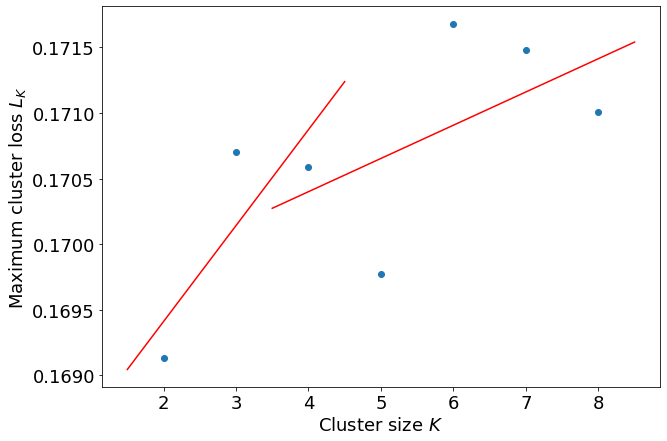

In [33]:
plt.figure(figsize=(10,7))
plot_elbow(k_list, loss_all, 4, 'Cluster size $K$', 'Maximum cluster loss $L_K$')
plt.savefig(f'K_select.png')

In [3]:
def plot_elbow(x, y, elbow, xlabel, ylabel):
    plt.scatter(x, y)
    e = x.index(elbow)

    lr_model = LinearRegression(fit_intercept=True)
    lr_model.fit(np.expand_dims(x[:e+1], axis=-1), y[:e+1])
    xfit = [x[0]-0.5, x[e]+0.5]
    yfit = lr_model.predict(np.expand_dims(xfit, axis=-1))
    plt.plot(xfit, yfit, c='r')

    lr_model = LinearRegression(fit_intercept=True)
    lr_model.fit(np.expand_dims(x[e:], axis=-1), y[e:])
    xfit = [x[e]-0.5, x[-1]+0.5]
    yfit = lr_model.predict(np.expand_dims(xfit, axis=-1))
    plt.plot(xfit, yfit, c='r')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

# Some metrics

In [7]:
chs = []
sss = []
dbs = []
acc = []
# for n_comp in range(2,10):
n_comp = 5
gmm = GaussianMixture(n_components=n_comp, warm_start=True, max_iter=1000)
pred_labels = gmm.fit_predict(encoded)
# acc.append(utils.cluster_accuracy(true_labels, pred_labels))
# chs.append(sklearn.metrics.calinski_harabasz_score(encoded, pred_labels))
# sss.append(sklearn.metrics.silhouette_score(encoded, pred_labels))
# dbs.append(sklearn.metrics.davies_bouldin_score(encoded, pred_labels))

    # plt.figure(figsize=(10, 10))
    # plt.scatter(tsne[:,0], tsne[:,1], c=pred_labels)
    # plt.title(f'{acc:.6f}')
    # plt.show()

In [25]:
gmm.weights_

array([0.29228843, 0.10820676, 0.27872236, 0.20675401, 0.11402845])

In [9]:
np.sum(gmm.predict_proba(encoded),axis=-1)

array([1., 1., 1., ..., 1., 1., 1.])

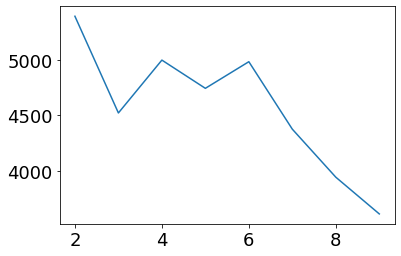

In [21]:
plt.plot(list(range(2,10)),chs)

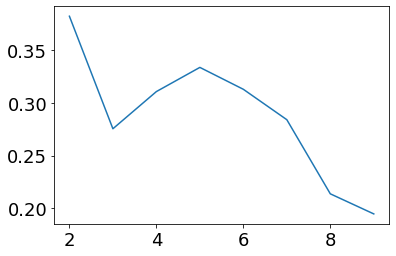

In [20]:
plt.plot(list(range(2,10)),sss)

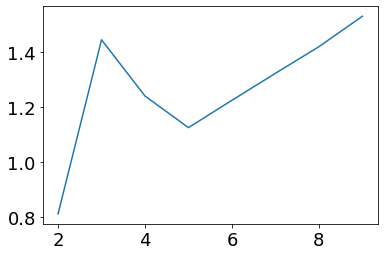

In [22]:
plt.plot(list(range(2,10)),dbs)

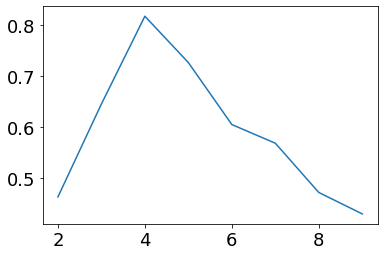

In [23]:
plt.plot(list(range(2,10)),acc)

# GMM and KMeans

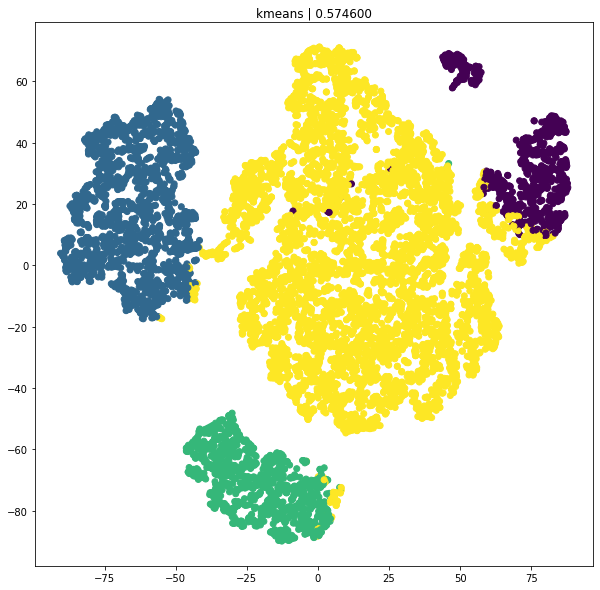

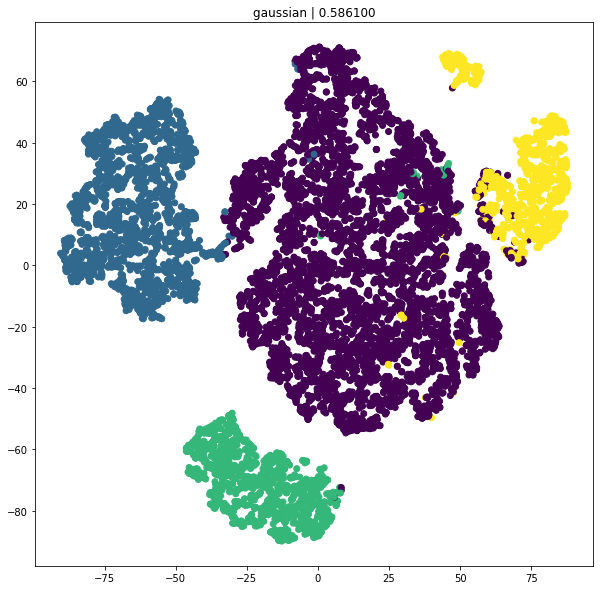

In [7]:
clusters = {'kmeans': KMeans(4), 
            'gaussian': GaussianMixture(n_components=4, warm_start=True, max_iter=1000)}
for name, cluster in clusters.items():
    pred_labels = cluster.fit_predict(encoded)
    acc = cluster_accuracy(true_labels, pred_labels)

    plt.figure(figsize=(10, 10))
    plt.scatter(tsne[:,0], tsne[:,1], c=pred_labels)
    plt.title(f'{name} | {acc:.6f}')
    plt.show()

In [8]:
cluster.means_

array([[-0.11284369,  0.09249761,  0.05252621, -0.15851435, -0.02557795,
         0.18063597,  0.24544342, -0.10675271,  0.06520724,  0.19268067],
       [ 0.20343879, -0.45517338,  0.53720277,  0.14874409,  0.32390382,
         0.28649464,  0.95272522, -0.14050629,  0.04825655,  0.31986785],
       [ 0.1545012 ,  0.44735536, -0.28342617,  0.11315407, -0.15151925,
         0.12332213,  0.01608693,  0.05427005,  0.38036038, -0.19529886],
       [-0.30792548, -0.02301968, -0.31532791, -0.06999644, -0.06687566,
        -0.02580661,  0.15173454, -0.04019248,  0.21584379,  0.30217623]])

In [9]:
proba = cluster.predict_proba(encoded)

In [10]:
(np.argmax(proba, axis=-1) == pred_labels).all()

True

In [11]:
min(np.max(proba,axis=-1))

0.4953868679291558

# Pipeline

In [53]:
gmm = GaussianMixture(n_components=3, warm_start=True, max_iter=1000)
pred_labels = gmm.fit_predict(encoded)
n_cell = len(Counter(pred_labels))

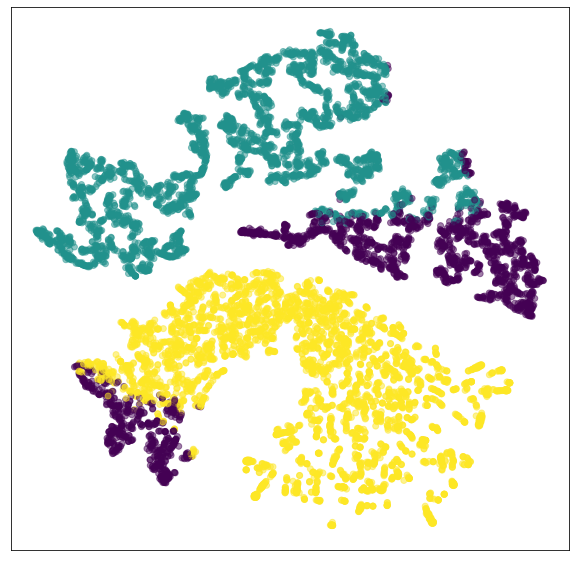

In [55]:
plt.figure(figsize=(10, 10))
utils.utils.make_palette(losses)
scatter = plt.scatter(tsne[:,0], tsne[:,1], c=pred_labels, alpha=0.5，cmap=matplotlib.colors.)
plt.xticks([])
plt.yticks([])
plt.show()

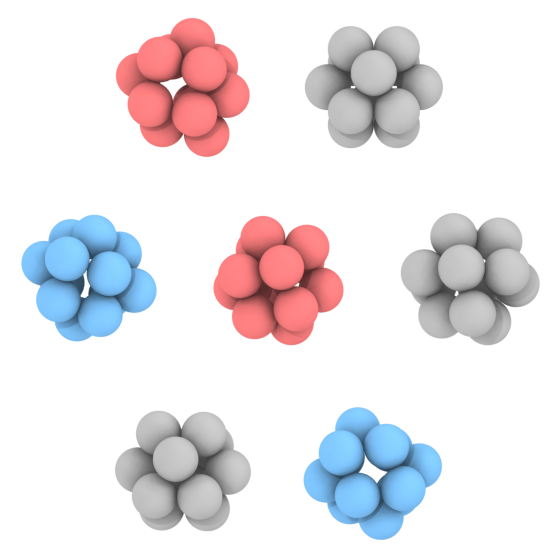

In [21]:
MODEL = 'B2_0602_1251_2285884_SP100_69_71'
plt.figure(figsize=(10,10))
# for i in range(7):
#     plt.subplot(3,3,i+1)
#     image = Image.open(f'model/{MODEL}/export/cell_sample_{i}.png')
#     image = image.crop((250,250,750,750))
#     plt.imshow(image)
#     plt.axis('off')

loc = [(0,1),(0,3), (1,0),(1,2),(1,4), (2,1),(2,3)]
for i in range(7):
    plt.subplot2grid((3,6),loc[i],colspan=2)
    image = Image.open(f'model/{MODEL}/export/cell_sample_{i}.png')
    image = image.crop((250,250,750,750))
    plt.imshow(image)
    plt.axis('off')

In [35]:
dirs = os.listdir('model')
dirs.sort()
dirs = dirs[:10]

In [36]:
latent_dims = []
best_losses = []
accuracies = []
for MODEL in dirs:
    args_dict = json.load(open(f'model/{MODEL}/training/arguments.json'))
    LATENT_DIM = args_dict['latent_dim']
    
    if not 2 <= LATENT_DIM <= 9:
        continue

    history = pd.read_csv(f'model/{MODEL}/training/logging.csv')
    accuracy = float(open(f'model/{MODEL}/report.txt').readline())
    # assert len(history) == 2000
    latent_dims.append(LATENT_DIM)
    valide_loss = history['loss']
    best_loss = min(valide_loss)
    best_losses.append(best_loss)
    accuracies.append(accuracy)

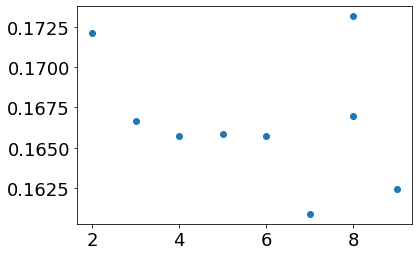

In [37]:
plt.scatter(latent_dims, best_losses)

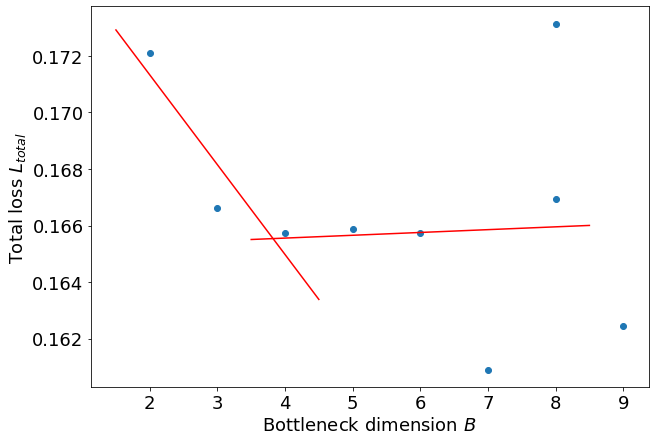

In [38]:
plt.figure(figsize=(10,7))
plot_elbow(latent_dims, best_losses, 4, 'Bottleneck dimension $B$', 'Total loss $L_{total}$')
plt.savefig(f'L_select.png')

In [6]:
a = np.random.rand(100,10)

In [ ]:
for 
np.interp(a, a.max())

In [1]:
from matplotlib.colors import LinearSegmentedColormap

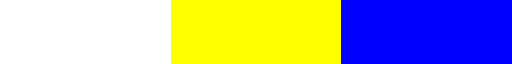

In [8]:
LinearSegmentedColormap.from_list('aas', [[1,1,1],[1,1,0],[0,0,1]], N=3)

In [1]:
def fun():
    for i in range(10):
        yield i

In [21]:
a = fun()
next(a)

0

In [22]:
a.next()

AttributeError: 'generator' object has no attribute 'next'

In [9]:
def gen():
    for i in [1, 2, 3, 4]:
        for j in ['A', 'B', 'C', 'D']:
            yield (i, j)

In [10]:
for k in gen():
    print(k)

(1, 'A')
(1, 'B')
(1, 'C')
(1, 'D')
(2, 'A')
(2, 'B')
(2, 'C')
(2, 'D')
(3, 'A')
(3, 'B')
(3, 'C')
(3, 'D')
(4, 'A')
(4, 'B')
(4, 'C')
(4, 'D')


In [1]:
import time
def clock(func):
    """this is outer clock function"""

    def clocked(*args, **kwargs):  # -- 1
        """this is inner clocked function"""
        start_time = time.time()
        result = func(*args, **kwargs)  # --> 2
        time_cost = time.time() - start_time
        print(func.__name__ + " func time_cost -> {} s".format(time_cost))
        return result
    return clocked  # --> 3

In [2]:
@clock
def fun():
    time.sleep(1)

In [3]:
for i in range(10):
    fun()

fun func time_cost -> 1.0010695457458496 s
fun func time_cost -> 1.0010666847229004 s
fun func time_cost -> 1.0010614395141602 s
fun func time_cost -> 1.0010573863983154 s
fun func time_cost -> 1.0010571479797363 s
fun func time_cost -> 1.0010442733764648 s
fun func time_cost -> 1.0010809898376465 s
fun func time_cost -> 1.0010602474212646 s
fun func time_cost -> 1.0010547637939453 s
fun func time_cost -> 1.0011203289031982 s


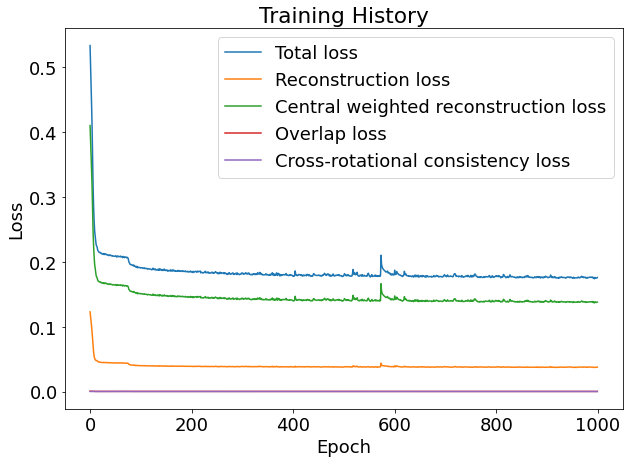

In [3]:
history = pd.read_csv(f'model/B2_0619_0410_9615_lj_samples_N19_L4_*/training/logging.csv')
crc = 0.001*history['cross_rotational_consistency_loss']
ovl = 0.001*history['overlap_loss']
scl = history['symmetric_chamfer_loss']
shl = history['symmetric_hausdorff_loss']
rec = 0.1*(scl + 0.1*shl)
wcl = history['weighted_chamfer_loss']
whl = history['weighted_hausdorff_loss']
cwr = wcl + 0.1*whl
loss = history['loss']

plt.figure(figsize=(10,7))
plt.plot(loss[:1000])
plt.plot(rec[:1000])
plt.plot(cwr[:1000])
plt.plot(ovl[:1000])
plt.plot(crc[:1000])

plt.title("Training History")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Total loss', 'Reconstruction loss', 'Central weighted reconstruction loss', 'Overlap loss', 'Cross-rotational consistency loss'])
plt.savefig(f'model/B2_0619_0410_9615_lj_samples_N19_L4_*/training/curve.png')
# plt.close()

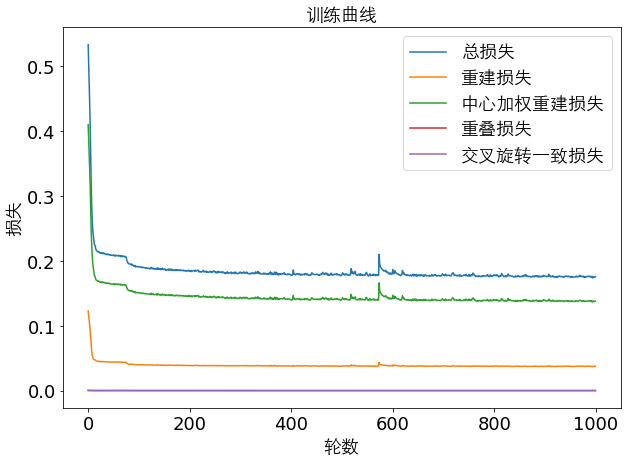

In [12]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/mnt/Edisk/kiwi/OPTI/data/STHeiti Light.ttc')

history = pd.read_csv(f'model/B2_0619_0410_9615_lj_samples_N19_L4_*/training/logging.csv')
crc = 0.001*history['cross_rotational_consistency_loss']
ovl = 0.001*history['overlap_loss']
scl = history['symmetric_chamfer_loss']
shl = history['symmetric_hausdorff_loss']
rec = 0.1*(scl + 0.1*shl)
wcl = history['weighted_chamfer_loss']
whl = history['weighted_hausdorff_loss']
cwr = wcl + 0.1*whl
loss = history['loss']

plt.figure(figsize=(10,7))
plt.plot(loss[:1000])
plt.plot(rec[:1000])
plt.plot(cwr[:1000])
plt.plot(ovl[:1000])
plt.plot(crc[:1000])

plt.title("训练曲线", fontproperties=font)
plt.ylabel("损失", fontproperties=font)
plt.xlabel("轮数", fontproperties=font)
legends = plt.legend(['总损失', '重建损失', '中心加权重建损失', '重叠损失', '交叉旋转一致损失']).get_texts()
for legend in legends:
	legend.set_fontproperties(font)
plt.savefig(f'image/curve.png', dpi=300)
# plt.close()